COMPARACION DE METODOS

a) Graficas de la interpolacion polinomial y regresion de los puntos PV que mejor se ajuste al caso. Identificar la mejor curva para resolver el problema.

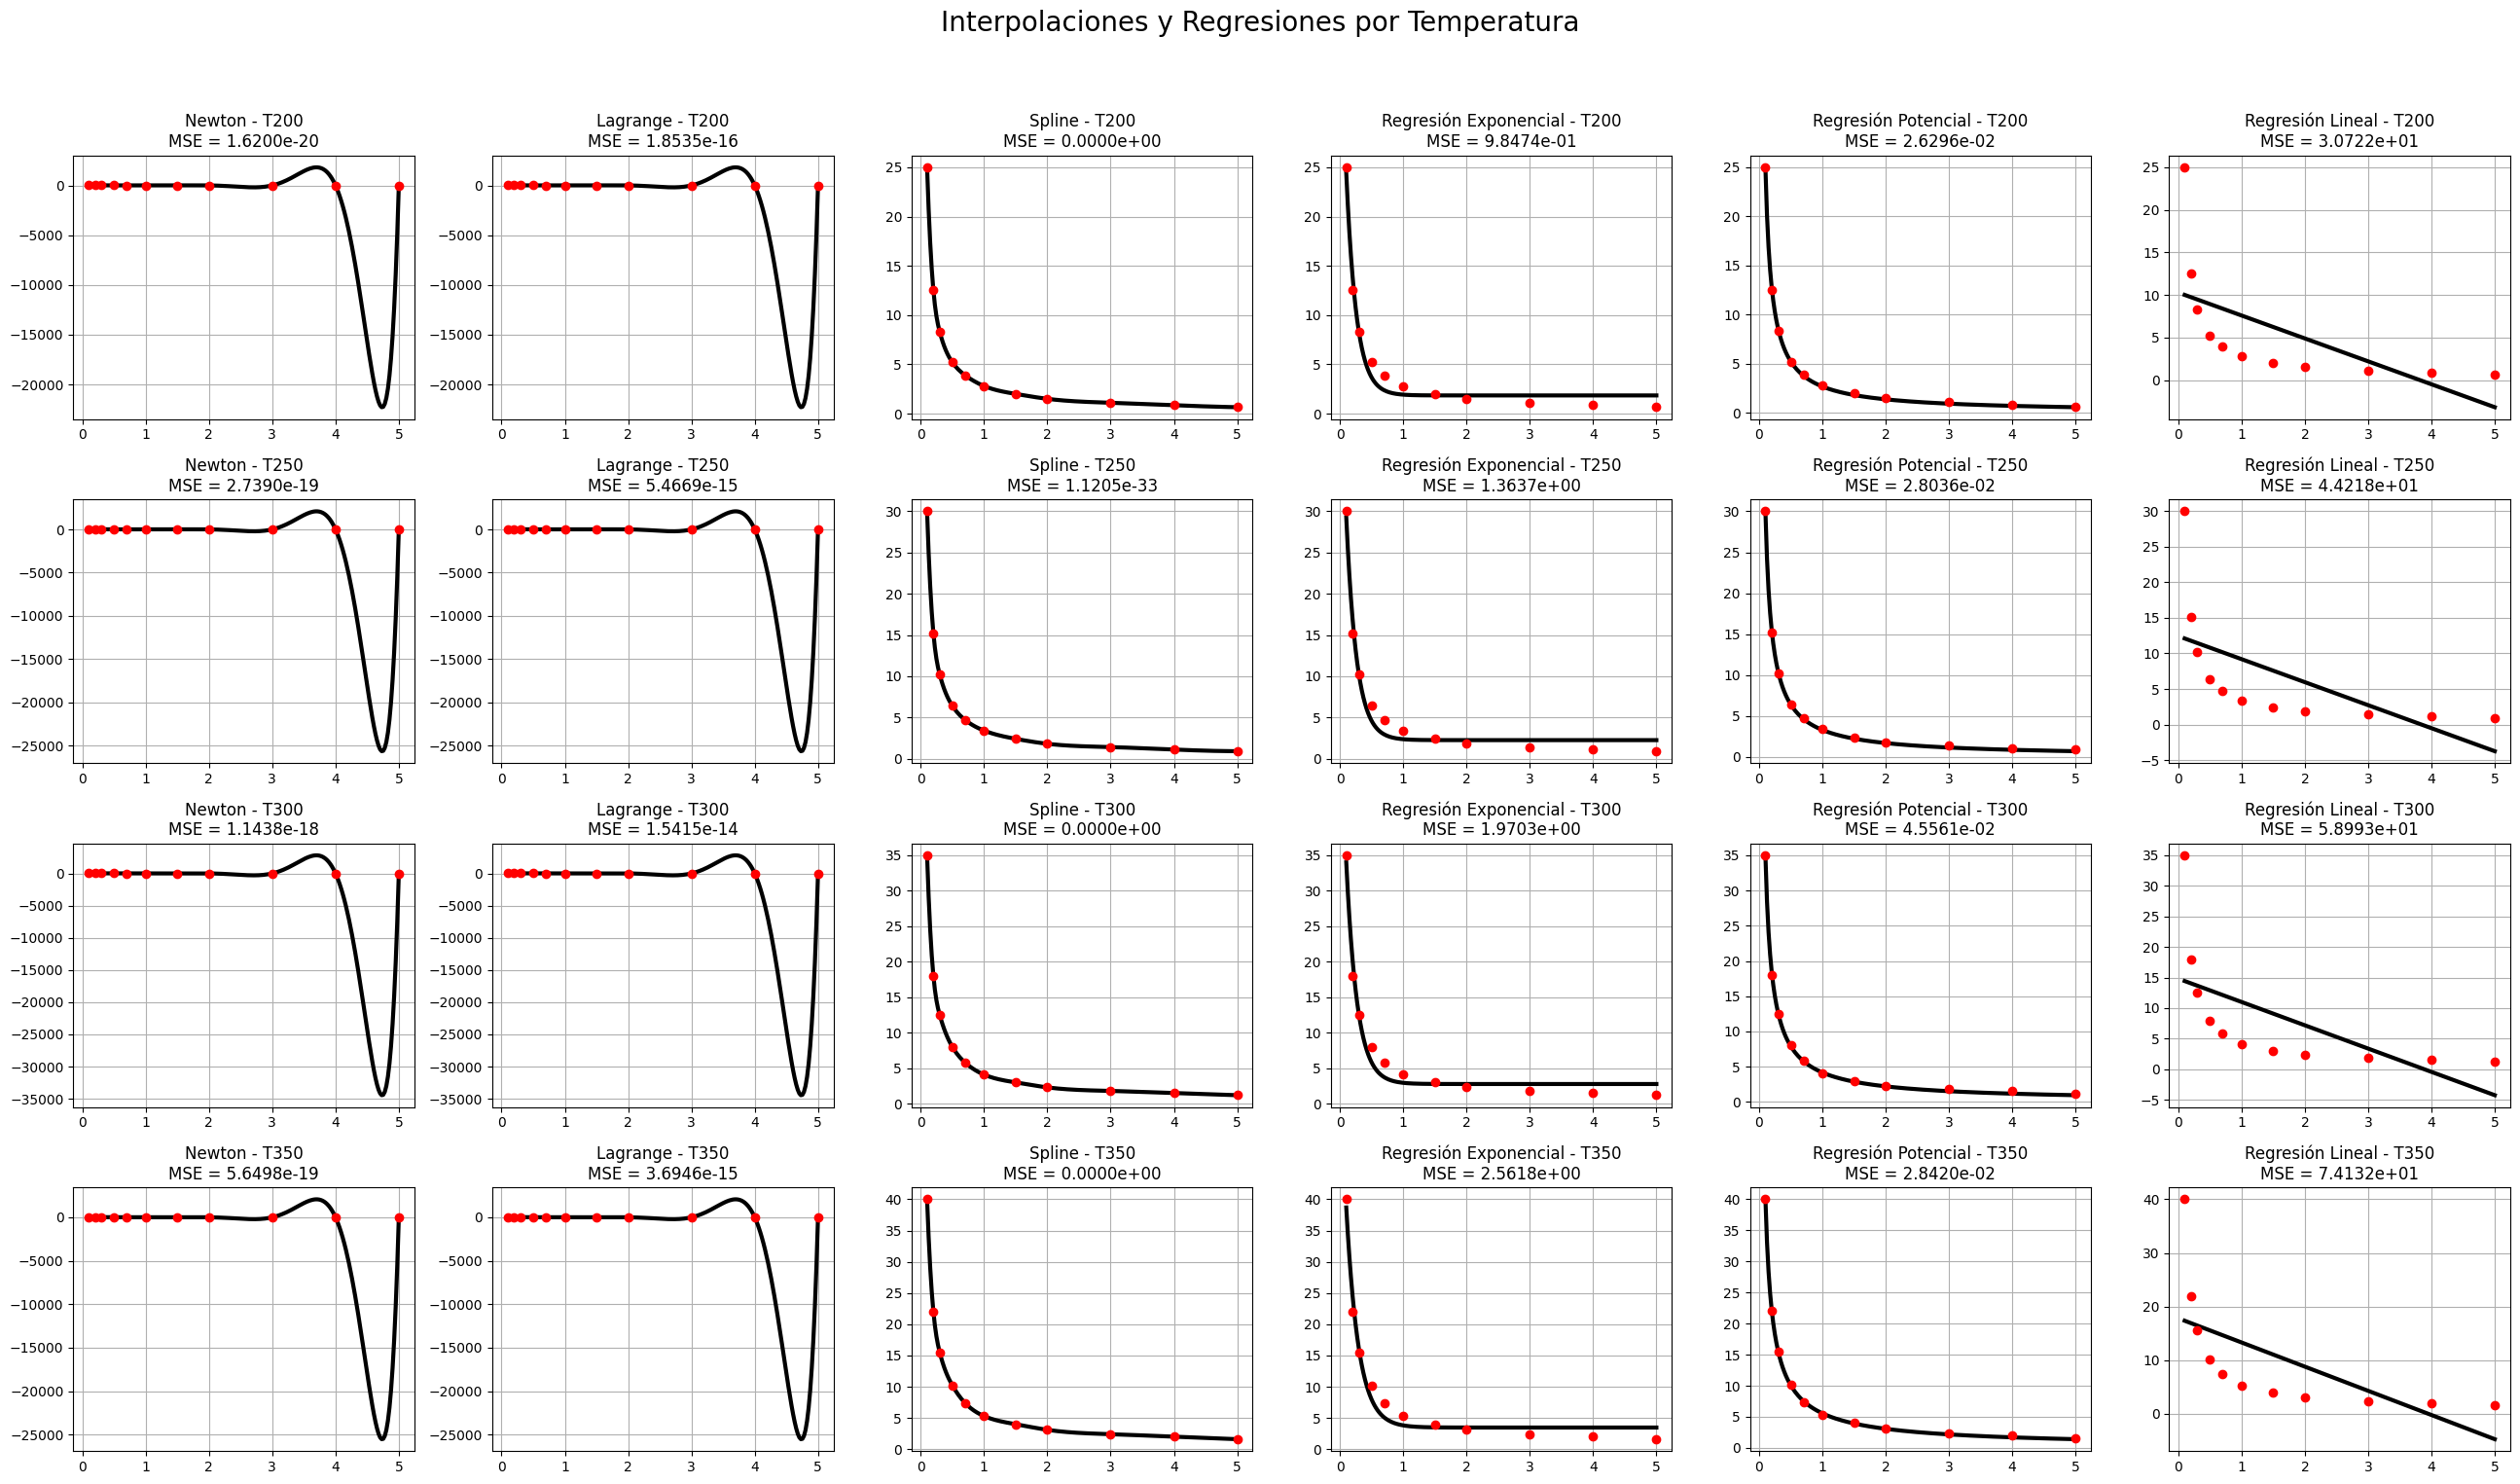

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import KroghInterpolator, CubicSpline, lagrange
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# === DATOS
datos = {
    'T200': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [25.0,12.5,8.3,5.2,3.9,2.8,2.0,1.5,1.1,0.85,0.65]},
    'T250': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [30.0,15.2,10.2,6.4,4.7,3.4,2.4,1.8,1.4,1.1,0.9]},
    'T300': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [35.0,18.0,12.5,8.0,5.8,4.1,3.0,2.3,1.8,1.5,1.2]},
    'T350': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [40.0,22.0,15.5,10.2,7.4,5.3,4.0,3.1,2.4,2.0,1.6]},
}

temperaturas = ['T200', 'T250', 'T300', 'T350']
metodos = ['Newton', 'Lagrange', 'Spline', 'Regresión Exponencial', 'Regresión Potencial', 'Regresión Lineal']
errores = {temp: {} for temp in temperaturas}

# === FIGURA
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(26, 16))
fig.suptitle("Interpolaciones y Regresiones por Temperatura", fontsize=20)

for i, temp in enumerate(temperaturas):
    x = datos[temp]['P']
    y = datos[temp]['V']

    for j, metodo in enumerate(metodos):
        ax = axs[i, j]
        try:
            if metodo == 'Newton':
                f = KroghInterpolator(x, y)

            elif metodo == 'Lagrange':
                pol = lagrange(x, y)
                f = lambda xv: pol(xv)

            elif metodo == 'Spline':
                f = CubicSpline(x, y)

            elif metodo == 'Regresión Exponencial':
                def modelo_exp(xv, a, b, c, d):
                    return a * np.exp(-b * xv / d) + c
                x_np = np.array(x)
                y_np = np.array(y)
                popt, _ = curve_fit(modelo_exp, x_np, y_np, p0=[max(y), 1, min(y), 1], maxfev=10000)
                f = lambda xv: modelo_exp(np.array(xv), *popt)

            elif metodo == 'Regresión Potencial':
                def modelo_pot(xv, a, b):
                    return a * xv ** b
                x_np = np.array(x)
                y_np = np.array(y)
                popt, _ = curve_fit(modelo_pot, x_np, y_np, p0=[1, -1], maxfev=10000)
                f = lambda xv: modelo_pot(np.array(xv), *popt)

            elif metodo == 'Regresión Lineal':
                b, a = np.polyfit(x, y, 1)
                f = lambda xv: a + b * np.array(xv)

            x_plot = np.linspace(min(x), max(x), 200)
            y_plot = f(x_plot)
            y_pred = f(x)
            mse = mean_squared_error(y, y_pred)
            errores[temp][metodo] = mse

            ax.plot(x_plot, y_plot, label='Interpolación', color="black", linewidth=3)
            ax.plot(x, y, 'ro', label='Datos')
            ax.set_title(f"{metodo} - {temp}\nMSE = {mse:.4e}")
            ax.grid(True)

        except Exception as e:
            errores[temp][metodo] = np.inf
            ax.text(0.5, 0.5, 'Error\n' + str(e), ha='center', va='center', fontsize=9)
            ax.set_title(f"{metodo} - {temp}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [26]:
import numpy as np
import pandas as pd
from scipy.interpolate import KroghInterpolator, CubicSpline, lagrange
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# Datos por temperatura
datos = {
    'T200': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [25.0,12.5,8.3,5.2,3.9,2.8,2.0,1.5,1.1,0.85,0.65]},
    'T250': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [30.0,15.2,10.2,6.4,4.7,3.4,2.4,1.8,1.4,1.1,0.9]},
    'T300': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [35.0,18.0,12.5,8.0,5.8,4.1,3.0,2.3,1.8,1.5,1.2]},
    'T350': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [40.0,22.0,15.5,10.2,7.4,5.3,4.0,3.1,2.4,2.0,1.6]},
}

# Métodos a comparar
metodos = ['Newton', 'Lagrange', 'Spline', 'Reg. Exp.', 'Reg. Pot.', 'Reg. Lineal']

# Inicializar DataFrame de errores
tabla_mse = pd.DataFrame(index=datos.keys(), columns=metodos)

# Calcular MSE por temperatura y método
for temp in datos:
    x = np.array(datos[temp]['P'])
    y = np.array(datos[temp]['V'])

    for metodo in metodos:
        try:
            if metodo == 'Newton':
                f = KroghInterpolator(x, y)
            elif metodo == 'Lagrange':
                pol = lagrange(x, y)
                f = lambda xv: pol(xv)
            elif metodo == 'Spline':
                f = CubicSpline(x, y)
            elif metodo == 'Reg. Exp.':
                def modelo_exp(xv, a, b, c, d):
                    return a * np.exp(-b * xv / d) + c
                popt, _ = curve_fit(modelo_exp, x, y, p0=[max(y), 1, min(y), 1], maxfev=10000)
                f = lambda xv: modelo_exp(xv, *popt)
            elif metodo == 'Reg. Pot.':
                def modelo_pot(xv, a, b):
                    return a * xv**b
                popt, _ = curve_fit(modelo_pot, x, y, p0=[1, -1], maxfev=10000)
                f = lambda xv: modelo_pot(xv, *popt)
            elif metodo == 'Reg. Lineal':
                coef = np.polyfit(x, y, 1)
                f = lambda xv: np.polyval(coef, xv)

            y_pred = f(x)
            mse = mean_squared_error(y, y_pred)
            tabla_mse.loc[temp, metodo] = mse

        except:
            tabla_mse.loc[temp, metodo] = np.nan

# Redondear valores para presentación
tabla_mse = tabla_mse.astype(float).round(6)

# Mostrar tabla de errores por temperatura
print("\nTabla comparativa de MSE por método y temperatura:")
print(tabla_mse)


Tabla comparativa de MSE por método y temperatura:
      Newton  Lagrange  Spline  Reg. Exp.  Reg. Pot.  Reg. Lineal
T200     0.0       0.0     0.0   0.984743   0.026296    30.722071
T250     0.0       0.0     0.0   1.363679   0.028036    44.218090
T300     0.0       0.0     0.0   1.970336   0.045561    58.993163
T350     0.0       0.0     0.0   2.561838   0.028420    74.131882


Gracias a las gráficas y a la tabla, podemos observar que hay métodos como la regresión lineal y la regresión exponencial que pese a generar curvas suaves, tienen un alto error por lo que no son muy exactas. Por otro lado, métodos como Newton y Lagrange son altamente exactos en los puntos dados (interpolan perfectamente), pero sus curvas se vuelven poco suaves en los extremos del intervalo. Finalmente, tanto el Spline Cúbico como la Regresión Potencial ofrecen una excelente combinación entre exactitud y suavidad en la curva ajustada. Por tanto, considero que estos dos últimos métodos son los mejores, pero por complejidad en las fórmulas me voy a quedar con el de regresión potencial.

b) Hacer una interpolacion de Hermite donde se representa una funcion V=f(T) considerando que la primera derivada dV/dT: 0.019 m³/kg·K a una T= 300 K y un volumen especí fico de 4.1 m³/kg.

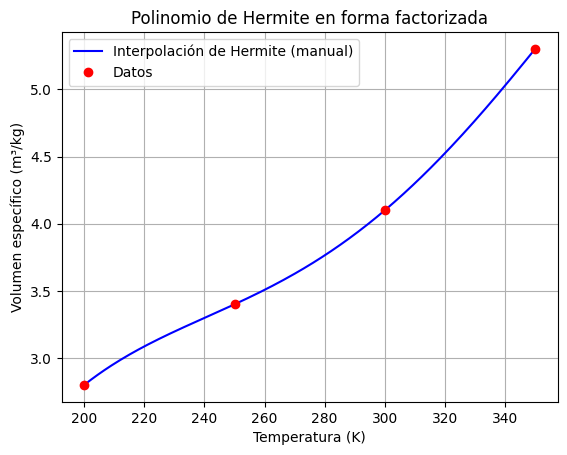


Polinomio de Hermite (forma factorizada):
H(T) = 2.8 + 0.012·(T−200) + 2·10⁻⁵·(T−200)(T−250) + 8·10⁻⁷·(T−200)(T−250)(T−300) − 5.3·10⁻⁹·(T−200)(T−250)(T−300)²


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Polinomio de Hermite (forma factorizada manual)
def H(T):
    return (2.8
            + 0.012 * (T - 200)
            + 2e-5 * (T - 200) * (T - 250)
            + 8e-7 * (T - 200) * (T - 250) * (T - 300)
            - 5.3e-9 * (T - 200) * (T - 250) * (T - 300)**2)

# === Graficar
temps = np.linspace(200, 350, 200)
vols = H(temps)

# Puntos originales
T_puntos = [200, 250, 300, 350]
V_puntos = [2.8, 3.4, 4.1, 5.3]

plt.plot(temps, vols, label='Interpolación de Hermite (manual)', color='blue')
plt.plot(T_puntos, V_puntos, 'ro', label='Datos')
plt.title('Polinomio de Hermite en forma factorizada')
plt.xlabel('Temperatura (K)')
plt.ylabel('Volumen específico (m³/kg)')
plt.legend()
plt.grid(True)
plt.show()

print("\nPolinomio de Hermite (forma factorizada):")
print("H(T) = 2.8"
    " + 0.012·(T−200)"
    " + 2·10⁻⁵·(T−200)(T−250)"
    " + 8·10⁻⁷·(T−200)(T−250)(T−300)"
    " − 5.3·10⁻⁹·(T−200)(T−250)(T−300)²")

In [1]:
import numpy as np
from scipy.optimize import fsolve
import pandas as pd

# === Constantes del metano
R = 8.31  # J/(mol·K)
T = 250  # K
Tc = 190.6  # K
Pc = 4.60e6  # Pa
w = 0.011
M = 0.01604  # kg/mol

# === Presiones (MPa → Pa)
P_mpa = np.array([0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])
P_pa = P_mpa * 1e6

# === Datos experimentales en m³/kg
V_experimental = np.array([30.0, 15.2, 10.2, 6.4, 4.7, 3.4, 2.4, 1.8, 1.4, 1.1, 0.9])

# === Cálculo de parámetros de Peng–Robinson
Tr = T / Tc
k = 0.37464 + 1.54226 * w - 0.26992 * w**2
alpha = (1 + k * (1 - np.sqrt(Tr)))**2
a = 0.45724 * R**2 * Tc**2 * alpha / Pc
b = 0.07780 * R * Tc / Pc

# === Ecuación de Peng–Robinson
def PR_eq(V, T, P):
    term1 = R * T / (V - b)
    term2 = a / (V * (V + b) + b * (V - b))
    return term1 - term2 - P

# === Resolver para cada presión
V_molar = []
V_especifico = []
errores = []

for i, P in enumerate(P_pa):
    V0 = 1e-4  # estimación inicial pequeña
    Vmol = fsolve(PR_eq, V0, args=(T, P))[0]
    Vkg = Vmol / M
    V_molar.append(Vmol)
    V_especifico.append(Vkg)
    errores.append(abs(Vkg - V_experimental[i]))

# === Crear tabla con todos los resultados
df = pd.DataFrame({
    'P (MPa)': P_mpa,
    'V experimental (m³/kg)': V_experimental,
    'V PR molar (m³/mol)': np.round(V_molar, 6),
    'V PR específico (m³/kg)': np.round(V_especifico, 6),
    'Error abs (m³/kg)': np.round(errores, 6)
})

# === Mostrar la tabla
print(df.to_string(index=False))

 P (MPa)  V experimental (m³/kg)  V PR molar (m³/mol)  V PR específico (m³/kg)  Error abs (m³/kg)
     0.1                    30.0             0.020695                 1.290214          28.709786
     0.2                    15.2             0.010308                 0.642614          14.557386
     0.3                    10.2             0.006845                 0.426748           9.773252
     0.5                     6.4             0.004075                 0.254055           6.145945
     0.7                     4.7             0.002888                 0.180045           4.519955
     1.0                     3.4             0.001998                 0.124538           3.275462
     1.5                     2.4             0.001305                 0.081369           2.318631
     2.0                     1.8             0.000959                 0.059788           1.740212
     3.0                     1.4             0.000613                 0.038219           1.361781
     4.0            

d) El calculo de C(T) es muy complejo y se necesita experimentacio n. Con los datos del apartado y considerando una presio n constante de 1 MPa determina a que T le corresponde un coeficiente del Virial de 6·10-4 m6/Kg2. Determinar el numero de iteraciones para un error de 0.01, 0.001 y de 10-10

In [2]:
import numpy as np

# === Constantes ===
P = 1e6  # Pa
R = 8.31 / 0.01604  # J/(kg·K) → R específico
C_deseado = 6e-4  # m^6/kg^2

# === Volumen específico por interpolación de Hermite (del apartado b)
def V(T):
    return (
        2.8
        + 0.012 * (T - 200)
        + 2e-5 * (T - 200) * (T - 250)
        + 8e-7 * (T - 200) * (T - 250) * (T - 300)
        - 5.3e-9 * (T - 200) * (T - 250) * (T - 300) ** 2
    )

# === Coeficiente B(T) del virial
def B(T):
    return -0.199 + 0.20 * np.exp(-1131 / T**2)

# === C(T) en función de T
def C(T):
    Vt = V(T)
    Z = (P * Vt) / (R * T)
    return (Z - 1 - B(T) / Vt) * Vt**2

# === Función objetivo
def f(T):
    return C(T) - C_deseado

# === Método de la secante
def metodo_secante(f, x0, x1, tol, max_iter=1000):
    for i in range(1, max_iter + 1):
        fx0 = f(x0)
        fx1 = f(x1)
        if fx1 - fx0 == 0:
            raise ZeroDivisionError("División por cero en método de la secante")
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)

        if abs(f(x2)) < tol:
            return x2, i

        x0, x1 = x1, x2

    raise RuntimeError("No se alcanzó la tolerancia en el número máximo de iteraciones.")

# === Ejecutar para cada tolerancia
tolerancias = [0.01, 0.001, 1e-10]
x0, x1 = 200, 350  # Dos valores iniciales

for tol in tolerancias:
    T_sol, iteraciones = metodo_secante(f, x0, x1, tol)
    print(f"Tolerancia = {tol:.0e} → T = {T_sol:.6f} K | Iteraciones: {iteraciones}")

Tolerancia = 1e-02 → T = 134.965234 K | Iteraciones: 10
Tolerancia = 1e-03 → T = 134.630281 K | Iteraciones: 12
Tolerancia = 1e-10 → T = 134.525321 K | Iteraciones: 17


e) Haga el mismo calculo que d) para 10-4 m6/Kg2 y 8.5·10-4 m6/Kg2 para un error de 0.001. Grafique los resultados.

C = 1.0e-04 → T = 134.5827 K (con 12 iteraciones)
C = 8.5e-04 → T = 134.6526 K (con 12 iteraciones)


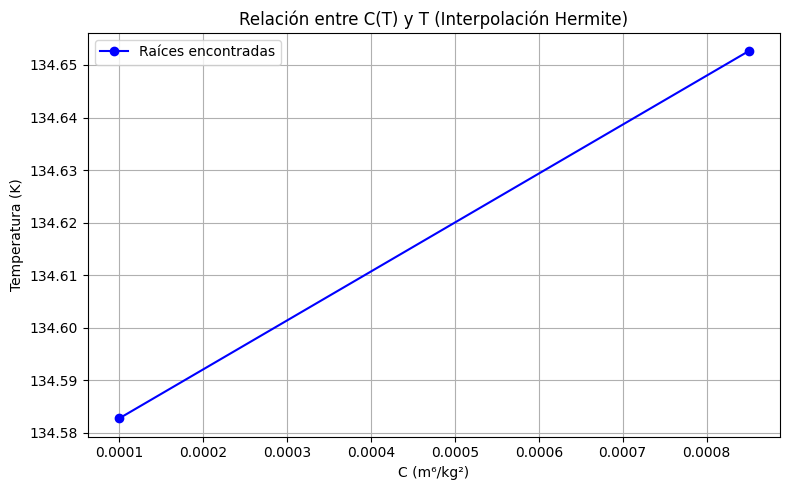

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# === Constantes
P = 1e6  # Pa
R = 8.31 / 0.01604  # J/(kg·K)
tolerancia = 0.001

# === Polinomio de Hermite del apartado b
def V(T):
    return (
        2.8
        + 0.012 * (T - 200)
        + 2e-5 * (T - 200) * (T - 250)
        + 8e-7 * (T - 200) * (T - 250) * (T - 300)
        - 5.3e-9 * (T - 200) * (T - 250) * (T - 300) ** 2
    )

# === Coeficiente del virial B(T)
def B(T):
    return -0.199 + 0.20 * np.exp(-1131 / T**2)

# === Función C(T)
def C(T):
    Vt = V(T)
    Z = (P * Vt) / (R * T)
    return (Z - 1 - B(T) / Vt) * Vt**2

# === Método de la secante
def secante(f, x0, x1, tol, max_iter=1000):
    for i in range(1, max_iter + 1):
        fx0, fx1 = f(x0), f(x1)
        if fx1 - fx0 == 0:
            raise ZeroDivisionError("División por cero")
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(f(x2)) < tol:
            return x2, i
        x0, x1 = x1, x2
    raise RuntimeError("No se alcanzó la tolerancia")

# === Casos pedidos en (e)
C_deseados = [1e-4, 8.5e-4]
T_resultados = []

for C_objetivo in C_deseados:
    def f(T): return C(T) - C_objetivo
    T_sol, iters = secante(f, 200, 350, tolerancia)
    T_resultados.append((C_objetivo, T_sol))
    print(f"C = {C_objetivo:.1e} → T = {T_sol:.4f} K (con {iters} iteraciones)")


# Separar valores para graficar
C_vals = [pair[0] for pair in T_resultados]
T_vals = [pair[1] for pair in T_resultados]

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(C_vals, T_vals, 'bo-', label="Raíces encontradas")
plt.xlabel("C (m⁶/kg²)")
plt.ylabel("Temperatura (K)")
plt.title("Relación entre C(T) y T (Interpolación Hermite)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

